In [6]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageFile
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [7]:
data_dir = '../data/Mushrooms/Mushrooms'
output_file = '../data/Mushrooms_preprocessed.pt'

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

dataset = datasets.ImageFolder(data_dir)

In [8]:
processed_images = []
labels = []

for idx in tqdm(range(len(dataset))):
    img, label = dataset[idx]
    img_tensor = transform(img)
    processed_images.append(img_tensor)
    labels.append(label)

processed_images = torch.stack(processed_images)
labels = torch.tensor(labels)

print(f'Images shape: {processed_images.shape}')
print(f'Labels shape: {labels.shape}')
print(f'\nПримеры (первые 15):')
for i in range(15):
    print(f'{i}: shape={processed_images[i].shape}, label={labels[i]}, min={processed_images[i].min():.3f}, max={processed_images[i].max():.3f}')

100%|██████████| 6714/6714 [00:28<00:00, 238.23it/s]


Images shape: torch.Size([6714, 3, 128, 128])
Labels shape: torch.Size([6714])

Примеры (первые 15):
0: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=0.961
1: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=1.000
2: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=1.000
3: shape=torch.Size([3, 128, 128]), label=0, min=-0.976, max=0.984
4: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=0.843
5: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=1.000
6: shape=torch.Size([3, 128, 128]), label=0, min=-0.969, max=0.969
7: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=0.953
8: shape=torch.Size([3, 128, 128]), label=0, min=-0.992, max=0.976
9: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=0.710
10: shape=torch.Size([3, 128, 128]), label=0, min=-0.992, max=0.859
11: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=0.561
12: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=0.600
13: shape=torch.Size([3, 

In [9]:
torch.save({
    'images': processed_images,
    'labels': labels,
    'class_to_idx': dataset.class_to_idx
}, output_file)

print(f'\nСохранено в {output_file}')


Сохранено в ../data/Mushrooms_preprocessed.pt


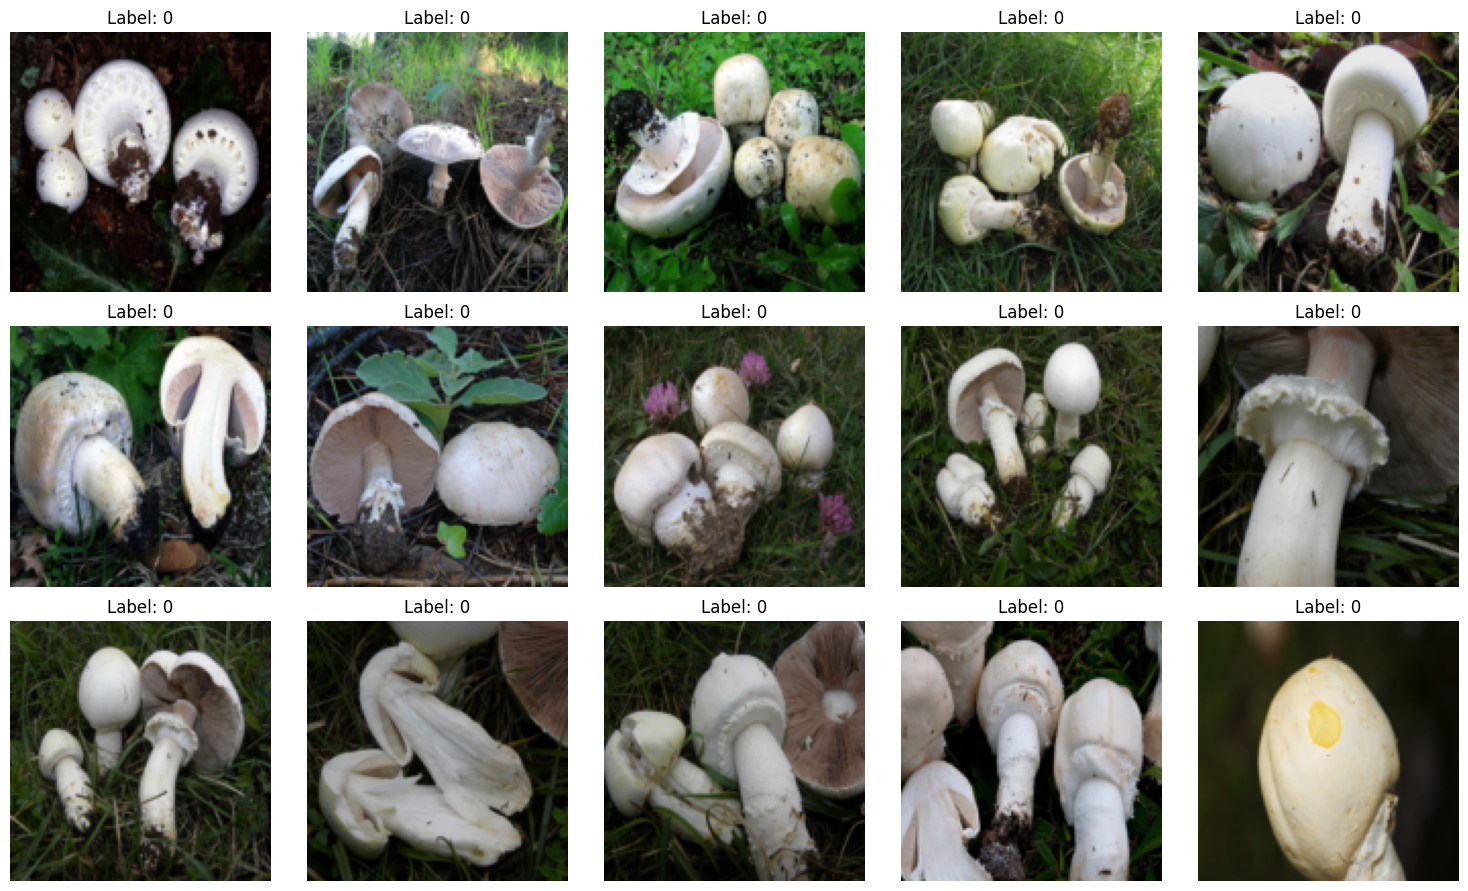

In [10]:
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i in range(15):
    img = processed_images[i].permute(1, 2, 0)
    img = (img * 0.5) + 0.5
    img = torch.clamp(img, 0, 1)
    
    axes[i].imshow(img)
    axes[i].set_title(f'Label: {labels[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Аугментация: RandomResizedCrop, RandomRotation, RandomFlip, ColorJitter, RandomPerspective

In [11]:
output_file_aug_light = '../data/Mushrooms_augmented_x2.pt'
output_file_aug_full = '../data/Mushrooms_augmented_x7.pt'

transform_aug = transforms.Compose([
    transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

dataset_aug = datasets.ImageFolder(data_dir)

In [12]:
augmented_images_light = []
augmented_labels_light = []
augmented_images_full = []
augmented_labels_full = []

augmentations_light = 2
augmentations_full = 7

for idx in tqdm(range(len(dataset_aug))):
    img, label = dataset_aug[idx]
    
    for i in range(augmentations_full):
        img_tensor = transform_aug(img)
        if i < augmentations_light:
            augmented_images_light.append(img_tensor)
            augmented_labels_light.append(label)
        augmented_images_full.append(img_tensor)
        augmented_labels_full.append(label)

augmented_images_light = torch.stack(augmented_images_light)
augmented_labels_light = torch.tensor(augmented_labels_light)
augmented_images_full = torch.stack(augmented_images_full)
augmented_labels_full = torch.tensor(augmented_labels_full)

print(f'Light (x2) images shape: {augmented_images_light.shape}')
print(f'Light (x2) labels shape: {augmented_labels_light.shape}')
print(f'Full (x7) images shape: {augmented_images_full.shape}')
print(f'Full (x7) labels shape: {augmented_labels_full.shape}')
print(f'\nПримеры light (первые 30):')
for i in range(30):
    print(f'{i}: shape={augmented_images_light[i].shape}, label={augmented_labels_light[i]}, min={augmented_images_light[i].min():.3f}, max={augmented_images_light[i].max():.3f}')

100%|██████████| 6714/6714 [02:19<00:00, 48.22it/s]


Light (x2) images shape: torch.Size([13428, 3, 128, 128])
Light (x2) labels shape: torch.Size([13428])
Full (x7) images shape: torch.Size([46998, 3, 128, 128])
Full (x7) labels shape: torch.Size([46998])

Примеры light (первые 30):
0: shape=torch.Size([3, 128, 128]), label=0, min=-0.984, max=1.000
1: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=1.000
2: shape=torch.Size([3, 128, 128]), label=0, min=-0.992, max=0.765
3: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=1.000
4: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=1.000
5: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=1.000
6: shape=torch.Size([3, 128, 128]), label=0, min=-0.992, max=0.835
7: shape=torch.Size([3, 128, 128]), label=0, min=-0.992, max=0.969
8: shape=torch.Size([3, 128, 128]), label=0, min=-0.914, max=0.773
9: shape=torch.Size([3, 128, 128]), label=0, min=-1.000, max=1.000
10: shape=torch.Size([3, 128, 128]), label=0, min=-0.914, max=0.608
11: shape=torch.Size([3, 128, 

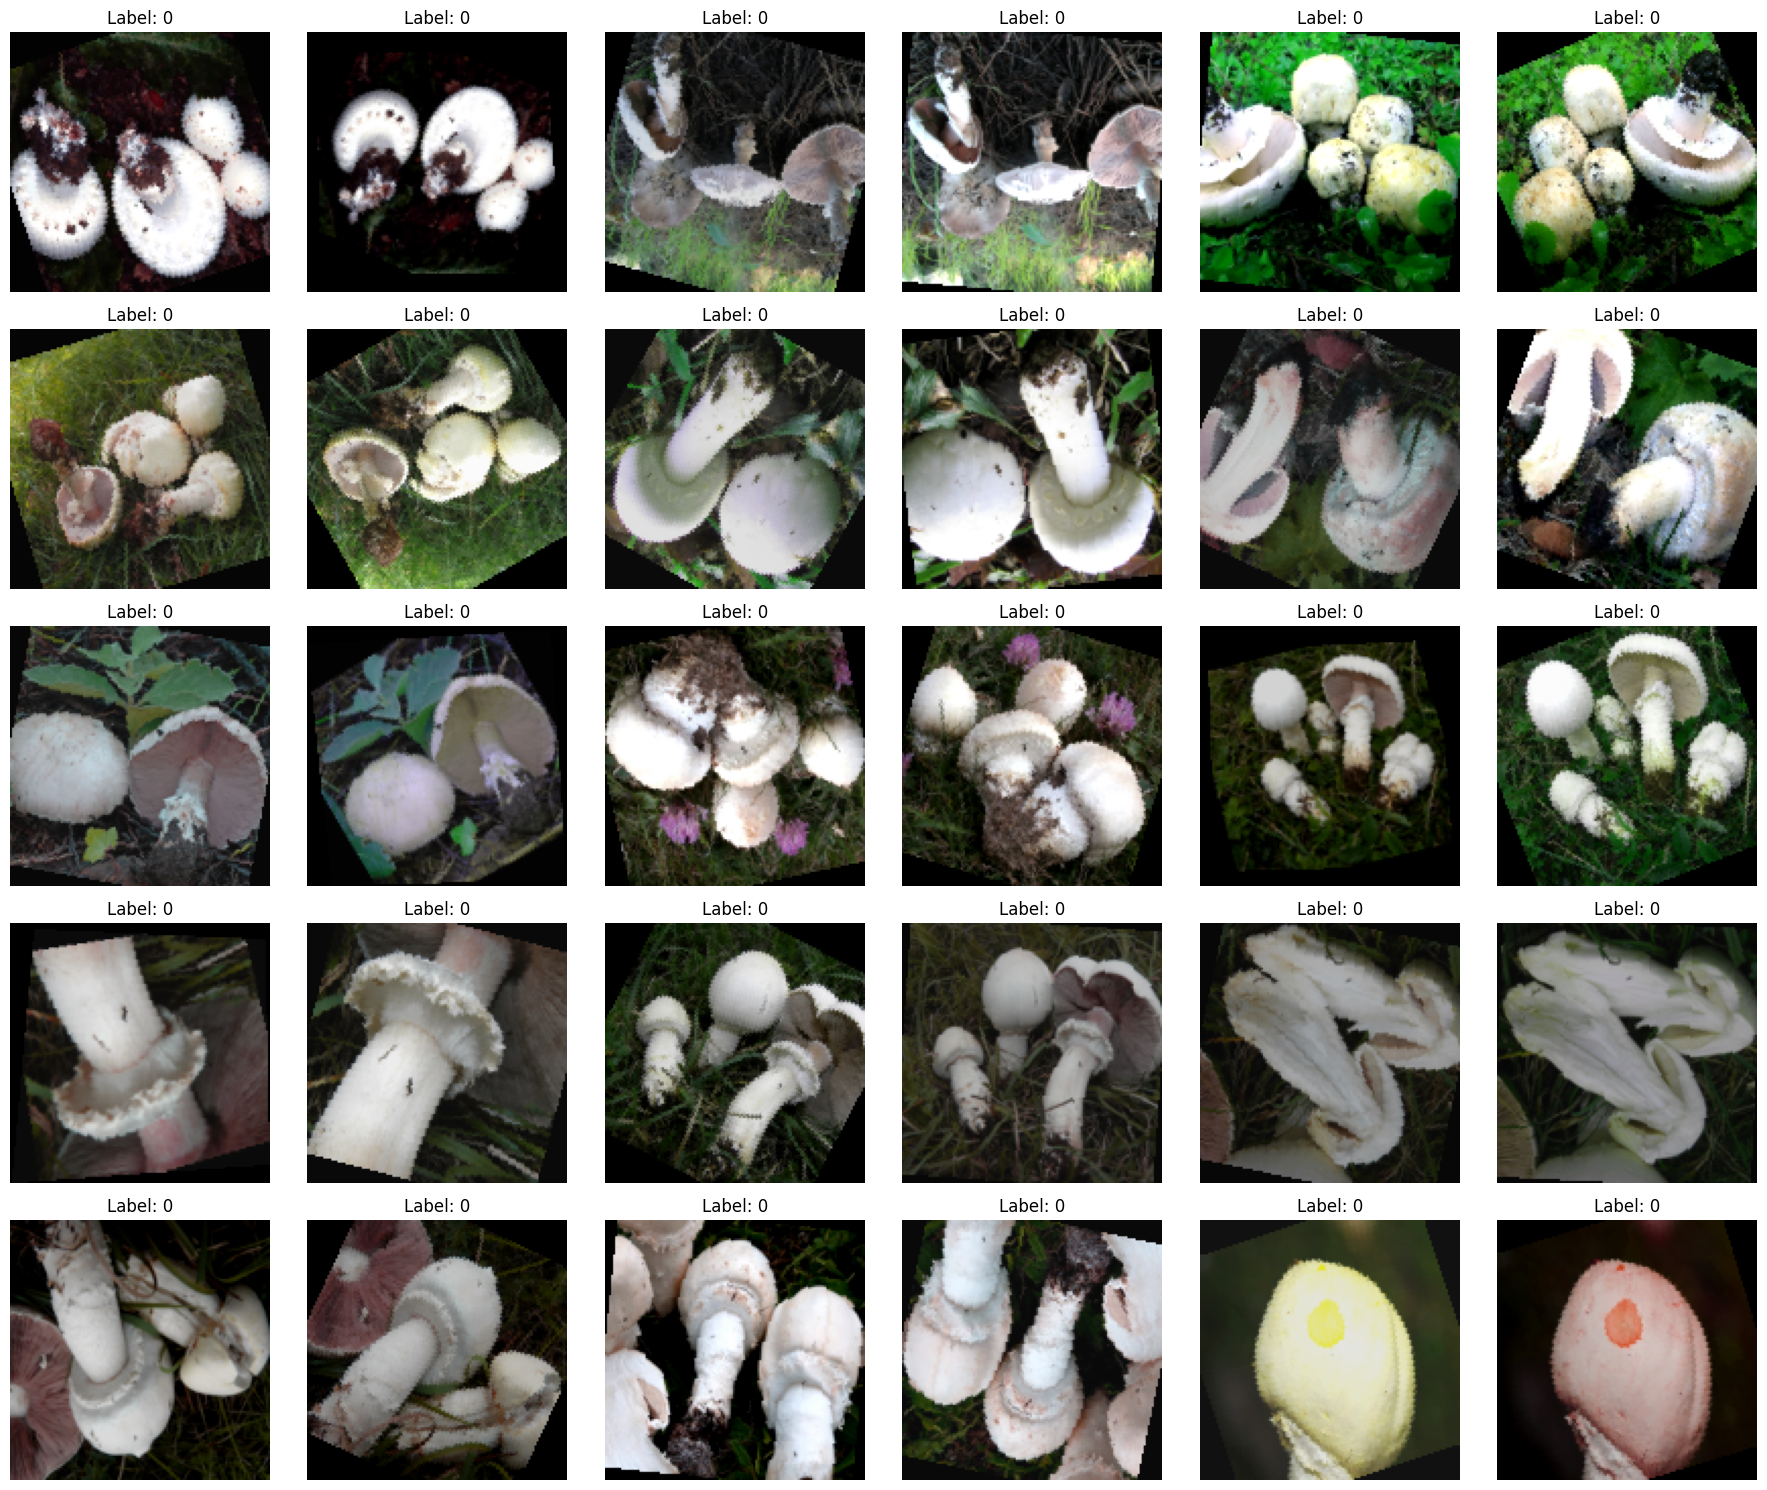

In [13]:
fig, axes = plt.subplots(5, 6, figsize=(18, 15))
axes = axes.flatten()

for i in range(30):
    img = augmented_images_light[i].permute(1, 2, 0)
    img = (img * 0.5) + 0.5
    img = torch.clamp(img, 0, 1)
    
    axes[i].imshow(img)
    axes[i].set_title(f'Label: {augmented_labels_light[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [14]:
torch.save({
    'images': augmented_images_light,
    'labels': augmented_labels_light,
    'class_to_idx': dataset_aug.class_to_idx
}, output_file_aug_light)

torch.save({
    'images': augmented_images_full,
    'labels': augmented_labels_full,
    'class_to_idx': dataset_aug.class_to_idx
}, output_file_aug_full)

print(f'\nСохранено в {output_file_aug_light}')
print(f'Сохранено в {output_file_aug_full}')


Сохранено в ../data/Mushrooms_augmented_x2.pt
Сохранено в ../data/Mushrooms_augmented_x7.pt
